# Restaurant Food Cost Dataset

Who doesn’t love food? All of us must have craving for at least a few favourite food items, we may also have a few places where we like to get them, a restaurant which serves our favourite food the way we want it to be. But there is one factor that will make us reconsider having our favourite food from our favourite restaurant, the cost. Here in this project, we will build a predicting model and try to predict the cost of the food served by the restaurants across different cities in India. You will investigate the factors that really affect the cost, and try to gain some very interesting insights that might help us to choose what to eat and from where.

Data Set
Size of training dataset: 12,690 records

Size of test dataset: 4,231 records

# Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Loading Train Dataset

In [2]:
df=pd.read_excel("C:/Users/stead/Downloads/Restaurant_food_cost/Participants_Data_Final/Data_Train.xlsx")
df.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


FEATURES
TITLE: The feature of the restaurant which can help identify what and for whom it is suitable for.

RESTAURANT_ID: A unique ID for each restaurant.

CUISINES: The variety of cuisines that the restaurant offers.

TIME: The open hours of the restaurant.

CITY: The city in which the restaurant is located.

LOCALITY: The locality of the restaurant.

RATING: The average rating of the restaurant by customers.

VOTES: The overall votes received by the restaurant.

COST: The average cost of a two-person meal.

In [4]:
df.shape

(12690, 9)

Here, we have 12690 rows and 9 columns.

In [5]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

QUICK BITES                 4218
CASUAL DINING               3652
None                        1003
CAFÉ                         607
DESSERT PARLOR               382
                            ... 
BAKERY,FOOD COURT              1
BEVERAGE SHOP,FOOD COURT       1
BAKERY,BEVERAGE SHOP           1
BAR,MICROBREWERY               1
CAFÉ,FINE DINING               1
Name: TITLE, Length: 113, dtype: int64


7264     8
4634     7
9910     6
13173    5
1571     5
        ..
461      1
2508     1
14794    1
10696    1
0        1
Name: RESTAURANT_ID, Length: 11892, dtype: int64


South Indian                                                 532
North Indian                                                 526
North Indian, Chinese                                        501
Fast Food                                                    286
Chinese                                                      167
                                                            ... 
North Indian, Continental, Biryani

In [6]:
df.dtypes

TITLE            object
RESTAURANT_ID     int64
CUISINES         object
TIME             object
CITY             object
LOCALITY         object
RATING           object
VOTES            object
COST              int64
dtype: object

We have two types of datatypes in our dataset object and int64.

In [7]:
for i in df.columns:
    print("Unique values in", i, df[i].nunique())

Unique values in TITLE 113
Unique values in RESTAURANT_ID 11892
Unique values in CUISINES 4155
Unique values in TIME 2689
Unique values in CITY 359
Unique values in LOCALITY 1416
Unique values in RATING 32
Unique values in VOTES 1847
Unique values in COST 86


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          12690 non-null  object
 1   RESTAURANT_ID  12690 non-null  int64 
 2   CUISINES       12690 non-null  object
 3   TIME           12690 non-null  object
 4   CITY           12578 non-null  object
 5   LOCALITY       12592 non-null  object
 6   RATING         12688 non-null  object
 7   VOTES          11486 non-null  object
 8   COST           12690 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 892.4+ KB


City, Locality, Ratings and  Votes have missing values in our dataset.

In [9]:
numeric_features=df.select_dtypes(include=[np.number])
numeric_features.columns

Index(['RESTAURANT_ID', 'COST'], dtype='object')

In [10]:
catagorical_features=df.select_dtypes(include=[np.object])
catagorical_features.columns

Index(['TITLE', 'CUISINES', 'TIME', 'CITY', 'LOCALITY', 'RATING', 'VOTES'], dtype='object')

In [11]:
import re
def extract_closed(time):
    a = re.findall('Closed \(.*?\)', time)
    if a != []:
        return a[0]
    else:
        return 'Open All Days'

df['CLOSED'] = df['TIME'].apply(extract_closed)

Exracted the closed time that on which day restraunt is closed in a week in our dataset.

In [13]:
df['TIME'] = df['TIME'].str.replace(r'Closed \(.*?\)','')
df['TIME'] = df['TIME'].str.replace(r'Closed...','')

In [14]:
df['RATING'].unique()

array(['3.6', '4.2', '3.8', '4.1', '4.0', '4.3', '3.9', '3.3', '3.4', '-',
       '4.5', '3.5', '4.4', '2.7', '3.7', '4.7', 'NEW', '3.1', '2.5',
       '4.6', '2.8', nan, '3.0', '3.2', '2.6', '2.9', '4.9', '4.8', '2.4',
       '2.3', '2.0', '2.1', '2.2'], dtype=object)

unique values in ratings.

In [15]:
df['RATING'] = df['RATING'].str.replace('NEW', 'nan')
df['RATING'] = df['RATING'].str.replace('-', 'nan').astype(float)

Replace the new and '-' value


In [16]:
df['RATING'].median()

3.8

median value of ratings for imputing

In [17]:
df['VOTES'] = df['VOTES'].str.replace(' votes', '').astype(float)

changed the datatypes of vote column.

In [18]:
df['RATING'].fillna(3.8, inplace=True)  #Impute with Median
df['VOTES'].fillna(44.0, inplace=True)  #Impute with Mode

In [19]:
df.CITY.fillna("Others",inplace=True)
df.LOCALITY.fillna("Others",inplace=True)


Replaced the null values in City and Locality columns with 'Others'

In [20]:
df['COST'] = df['COST'].astype(float)

changed the daattype of cost column

In [21]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

QUICK BITES                 4218
CASUAL DINING               3652
None                        1003
CAFÉ                         607
DESSERT PARLOR               382
                            ... 
BAKERY,FOOD COURT              1
BEVERAGE SHOP,FOOD COURT       1
BAKERY,BEVERAGE SHOP           1
BAR,MICROBREWERY               1
CAFÉ,FINE DINING               1
Name: TITLE, Length: 113, dtype: int64


7264     8
4634     7
9910     6
13173    5
1571     5
        ..
461      1
2508     1
14794    1
10696    1
0        1
Name: RESTAURANT_ID, Length: 11892, dtype: int64


South Indian                                                 532
North Indian                                                 526
North Indian, Chinese                                        501
Fast Food                                                    286
Chinese                                                      167
                                                            ... 
North Indian, Continental, Biryani

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TITLE          12690 non-null  object 
 1   RESTAURANT_ID  12690 non-null  int64  
 2   CUISINES       12690 non-null  object 
 3   TIME           12690 non-null  object 
 4   CITY           12690 non-null  object 
 5   LOCALITY       12690 non-null  object 
 6   RATING         12690 non-null  float64
 7   VOTES          12690 non-null  float64
 8   COST           12690 non-null  float64
 9   CLOSED         12690 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 991.5+ KB


Observations:
1.We have successfully imputed all the missig values
2.We have now three datatypes in our dataset object, float and int

In [23]:
df.isnull().sum()

TITLE            0
RESTAURANT_ID    0
CUISINES         0
TIME             0
CITY             0
LOCALITY         0
RATING           0
VOTES            0
COST             0
CLOSED           0
dtype: int64

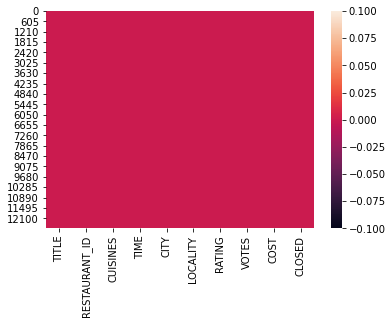

In [24]:
sns.heatmap(df.isnull())
plt.show()

Imputed all the missing and null values in our dataset and heatmap is above.

# Exploratory Data Analysis

# Statistical Summary

In [25]:
df.describe()

,RESTAURANT_ID,RATING,VOTES,COST
count,12690.000000,12690.000000,12690.000000,12690.000000
mean,7759.134121,3.786832,380.405753,655.252246
std,4504.874150,0.401588,809.110447,627.003540
min,0.000000,2.000000,4.000000,20.000000
25%,3863.250000,3.600000,44.000000,300.000000
50%,7740.000000,3.800000,132.000000,500.000000
75%,11688.750000,4.000000,405.000000,800.000000
max,15573.000000,4.900000,41186.000000,14000.000000


Observations:
1.Mean is greater than 50% for all the columns which means our data is positively skewed
2.Standard deviation for Restaurant ID is high it means data is spread througout.
3.After observing the 75% and 100% we can cleary say that in votes and cost column we have outliers present

In [26]:
df.corr() # correlation

,RESTAURANT_ID,RATING,VOTES,COST
RESTAURANT_ID,1.000000,0.030937,0.000403,0.040710
RATING,0.030937,1.000000,0.343333,0.318653
VOTES,0.000403,0.343333,1.000000,0.255723
COST,0.040710,0.318653,0.255723,1.000000


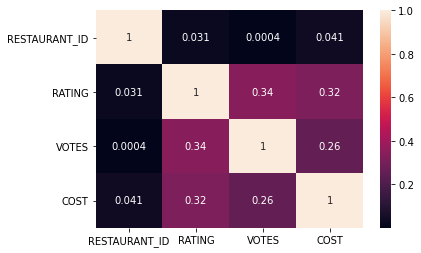

In [28]:
sns.heatmap(df.corr(),annot=True)

Observations:
1.We do not have any negative correlation in our dataset
2.Votes, rating and cost have very low positive correlation with each other
3.cost and restaurant id also have  very low positive correlation

Text(0.5, 1.0, 'Correlation with the target variable')

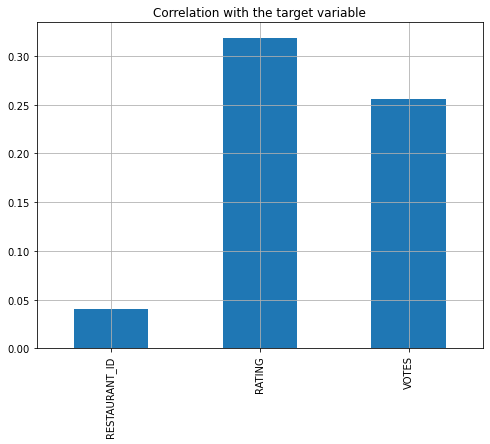

In [29]:
plt.figure(figsize=(8,6))
df.drop('COST',axis=1).corrwith(df['COST']).plot(kind='bar',grid=True)
plt.title("Correlation with the target variable")

Rating and votes have very good positive relationship with the target variable

# Univariate Analysis


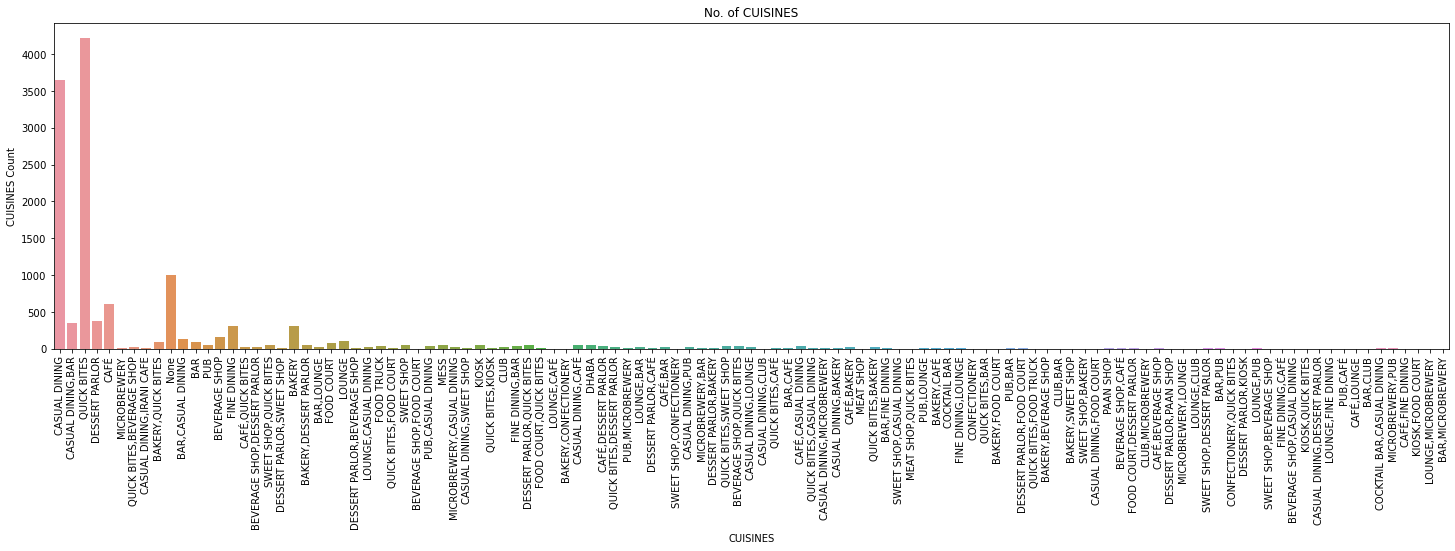

QUICK BITES                 4218
CASUAL DINING               3652
None                        1003
CAFÉ                         607
DESSERT PARLOR               382
                            ... 
BAKERY,FOOD COURT              1
BEVERAGE SHOP,FOOD COURT       1
BAKERY,BEVERAGE SHOP           1
BAR,MICROBREWERY               1
CAFÉ,FINE DINING               1
Name: TITLE, Length: 113, dtype: int64


In [30]:
plt.subplots(figsize=(25,6))
sns.countplot(x='TITLE',data=df)
plt.title("No. of CUISINES")
plt.xlabel("CUISINES")
plt.ylabel("CUISINES Count")
plt.xticks(rotation=90)
plt.show()
print(df['TITLE'].value_counts())

Quick bite is the most preferred cusine and followed by casual dining.

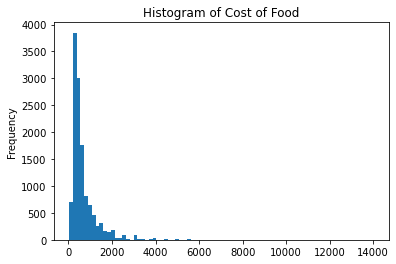

In [31]:
df['COST'].plot.hist(bins=80)
plt.title('Histogram of Cost of Food')
plt.show()

cost of the food is positively skewed

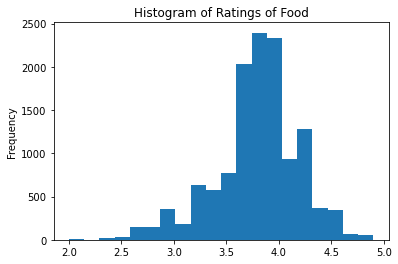

In [32]:
df['RATING'].plot.hist(bins=20)
plt.title('Histogram of Ratings of Food')
plt.show()

The maximum rating ranges from 3.5 to 4.5

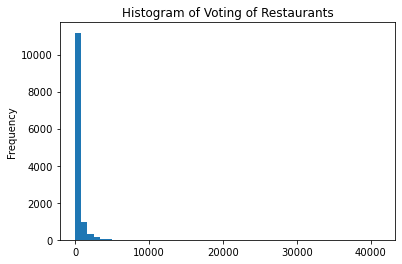

In [33]:
df['VOTES'].plot.hist(bins=50)
plt.title('Histogram of Voting of Restaurants')
plt.show()

The most of the votings is positively skewed

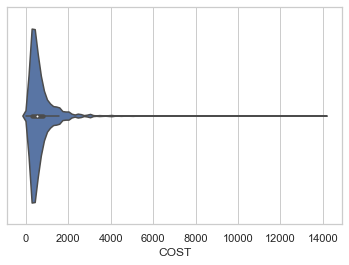

In [34]:
sns.set(style='whitegrid')
sns.violinplot(df['COST'])
plt.show()

The median is somewhere around 800 to 100 and there are outliers present in the dataset

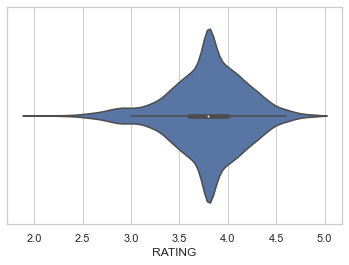

In [35]:
sns.set(style='whitegrid')
sns.violinplot(df['RATING'])
plt.show()

The median is around 3.6 to 3.9 and the data is clustered around the mean

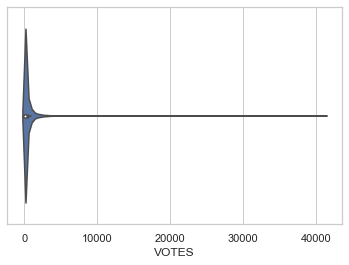

In [36]:
sns.set(style='whitegrid')
sns.violinplot(df['VOTES'])
plt.show()

The data is skewed and there are outliers present.

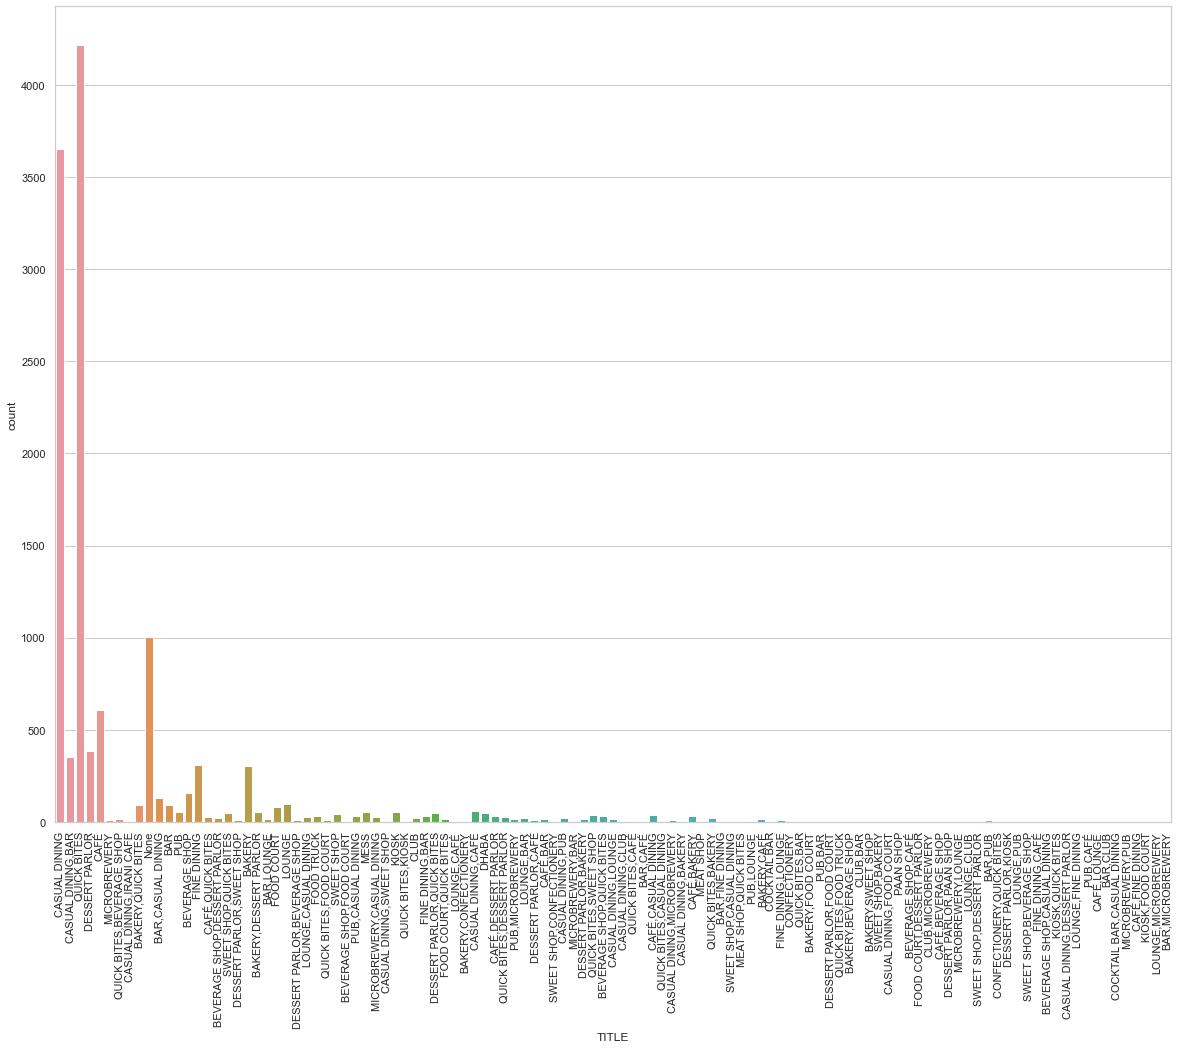

In [37]:
plt.figure(figsize=(20,15))
sns.countplot(df['TITLE'])
plt.xticks(rotation=90)
plt.show()

Quick bites and casual dining are most preffered.

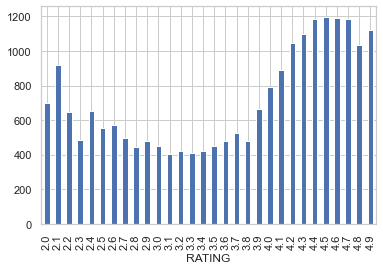

In [38]:
df.groupby(['RATING'])['COST'].mean().plot(kind='bar')

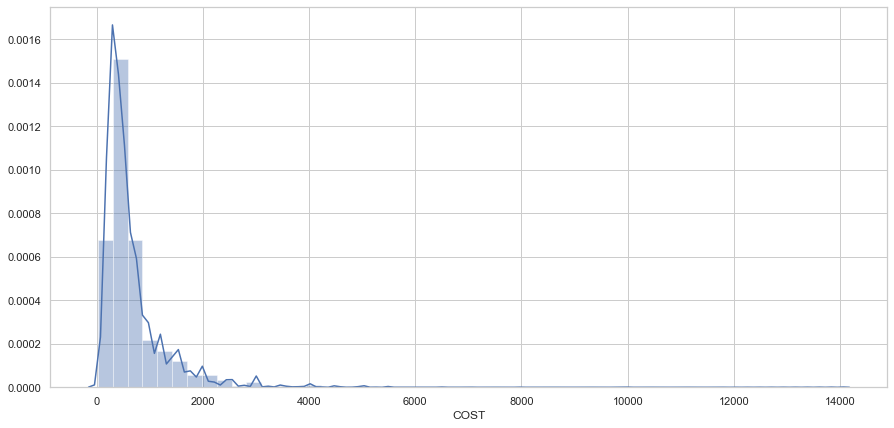

In [39]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.distplot(df['COST'].sort_values(), ax=ax)
plt.show()

The data is positively skewed and maximum is around 500 to 600

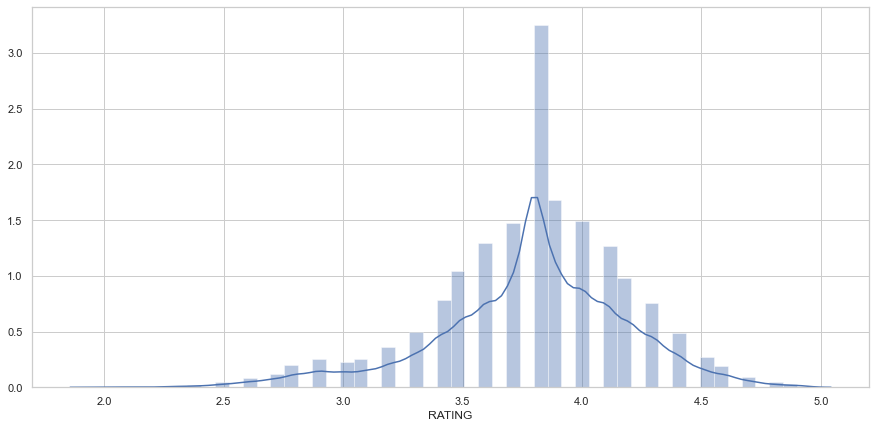

In [40]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.distplot(df['RATING'].sort_values(), ax=ax)
plt.show()

The maximum rating is around 3.7 and the data is normally distributed

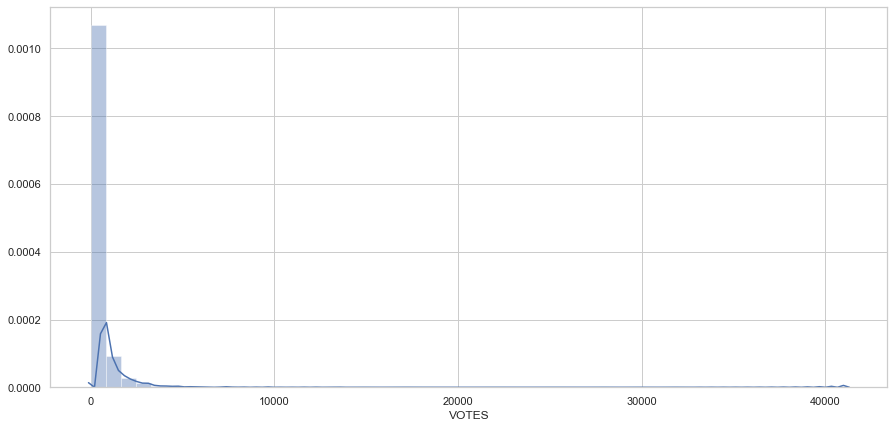

In [41]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.distplot(df['VOTES'].sort_values(), ax=ax)
plt.show()

very few people voted.

# Bivariate Analysis


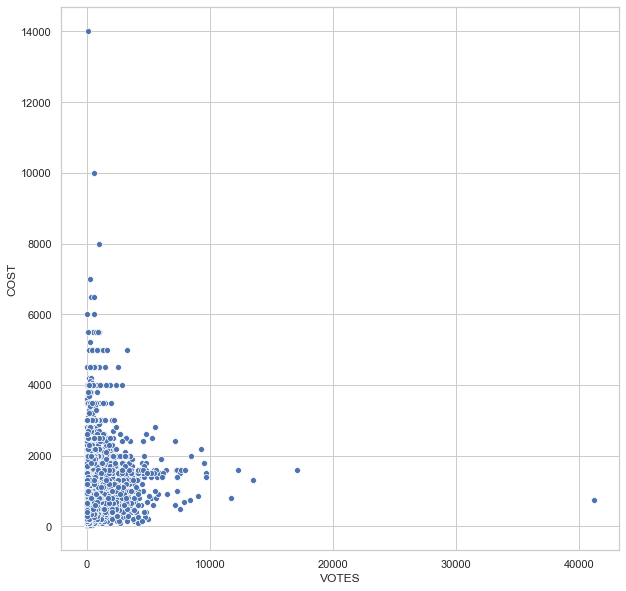

In [42]:
plt.figure(figsize=(10,10))
sns.scatterplot(y='COST',x='VOTES',data=df)
plt.show()

The increase in the cost the number of votes are decreased and they are clustered around

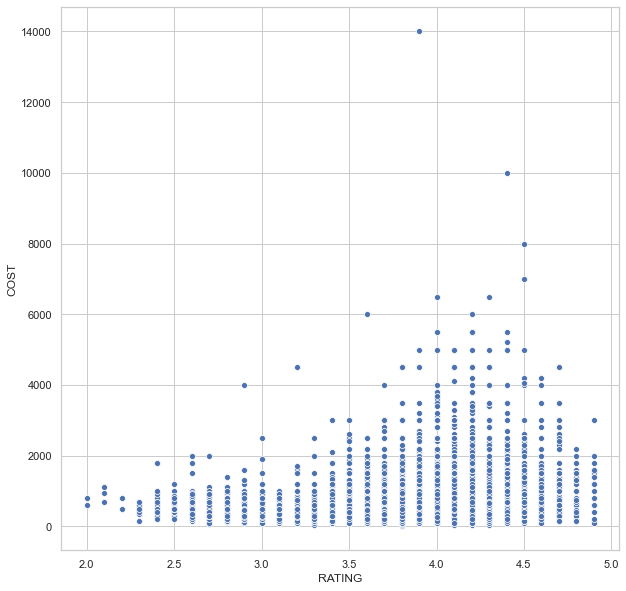

In [43]:
plt.figure(figsize=(10,10))
sns.scatterplot(y='COST',x='RATING',data=df)
plt.show()

The increase in the price the rating also improves

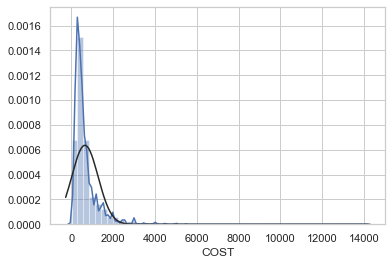

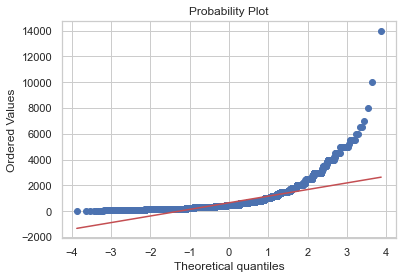

In [44]:
from scipy import stats
from scipy.stats import norm
sns.distplot(df['COST'], fit = norm)
fig= plt.figure()
res = stats.probplot(df['COST'], plot = plt)

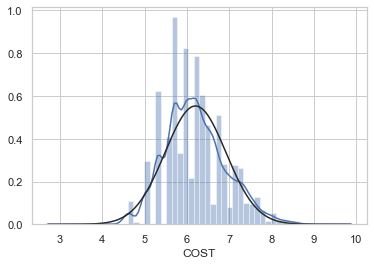

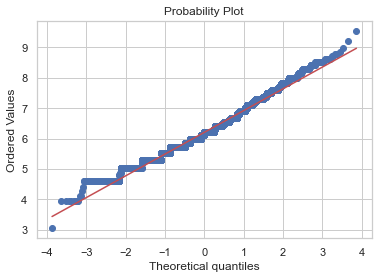

In [45]:
df['COST']= np.log1p(df['COST'])
sns.distplot(df['COST'], fit = norm)
fig = plt.figure()
res = stats.probplot(df['COST'],plot = plt)

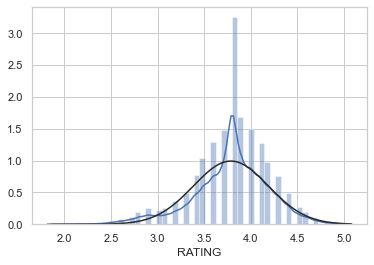

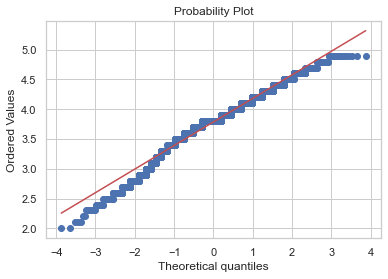

In [46]:
sns.distplot(df['RATING'], fit = norm)
fig= plt.figure()
res = stats.probplot(df['RATING'], plot = plt)

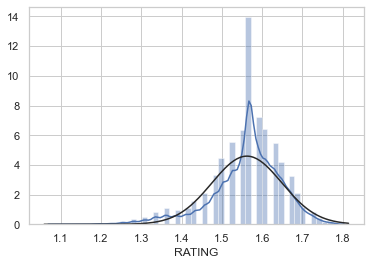

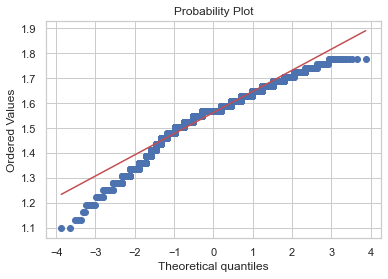

In [47]:
df['RATING']= np.log1p(df['RATING'])
sns.distplot(df['RATING'], fit = norm)
fig = plt.figure()
res = stats.probplot(df['RATING'],plot = plt)

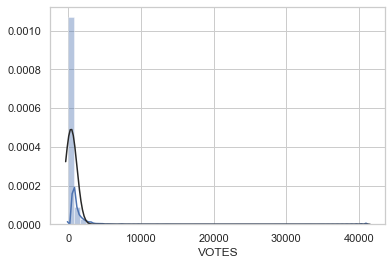

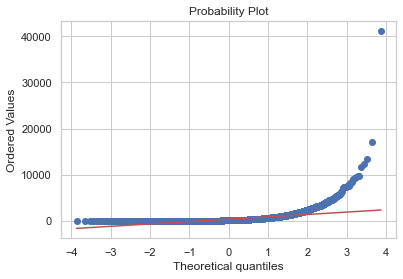

In [48]:
sns.distplot(df['VOTES'], fit = norm)
fig= plt.figure()
res = stats.probplot(df['VOTES'], plot = plt)

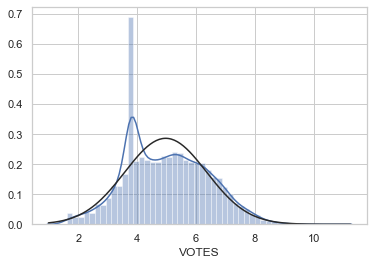

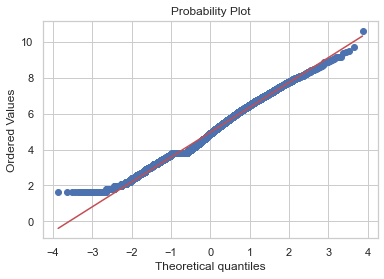

In [50]:
df['VOTES']= np.log1p(df['VOTES'])
sns.distplot(df['VOTES'], fit = norm)
fig = plt.figure()
res = stats.probplot(df['VOTES'],plot = plt)

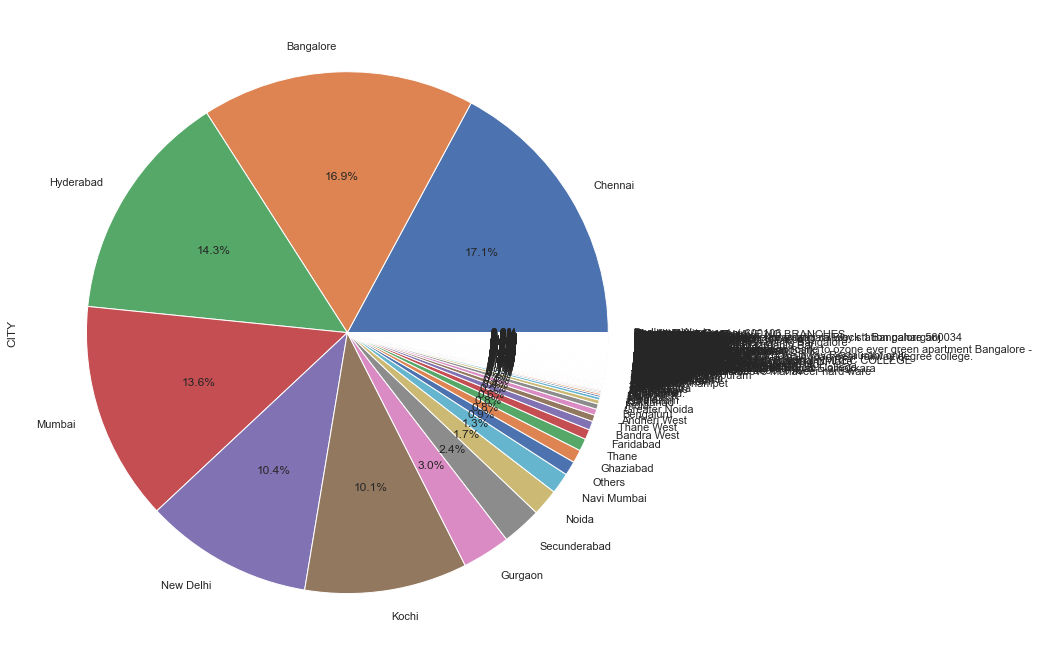

In [51]:
df['CITY'].value_counts().plot.pie(figsize = (12,12), autopct = '%.1f%%')

Majorly metro cities ordered more food.

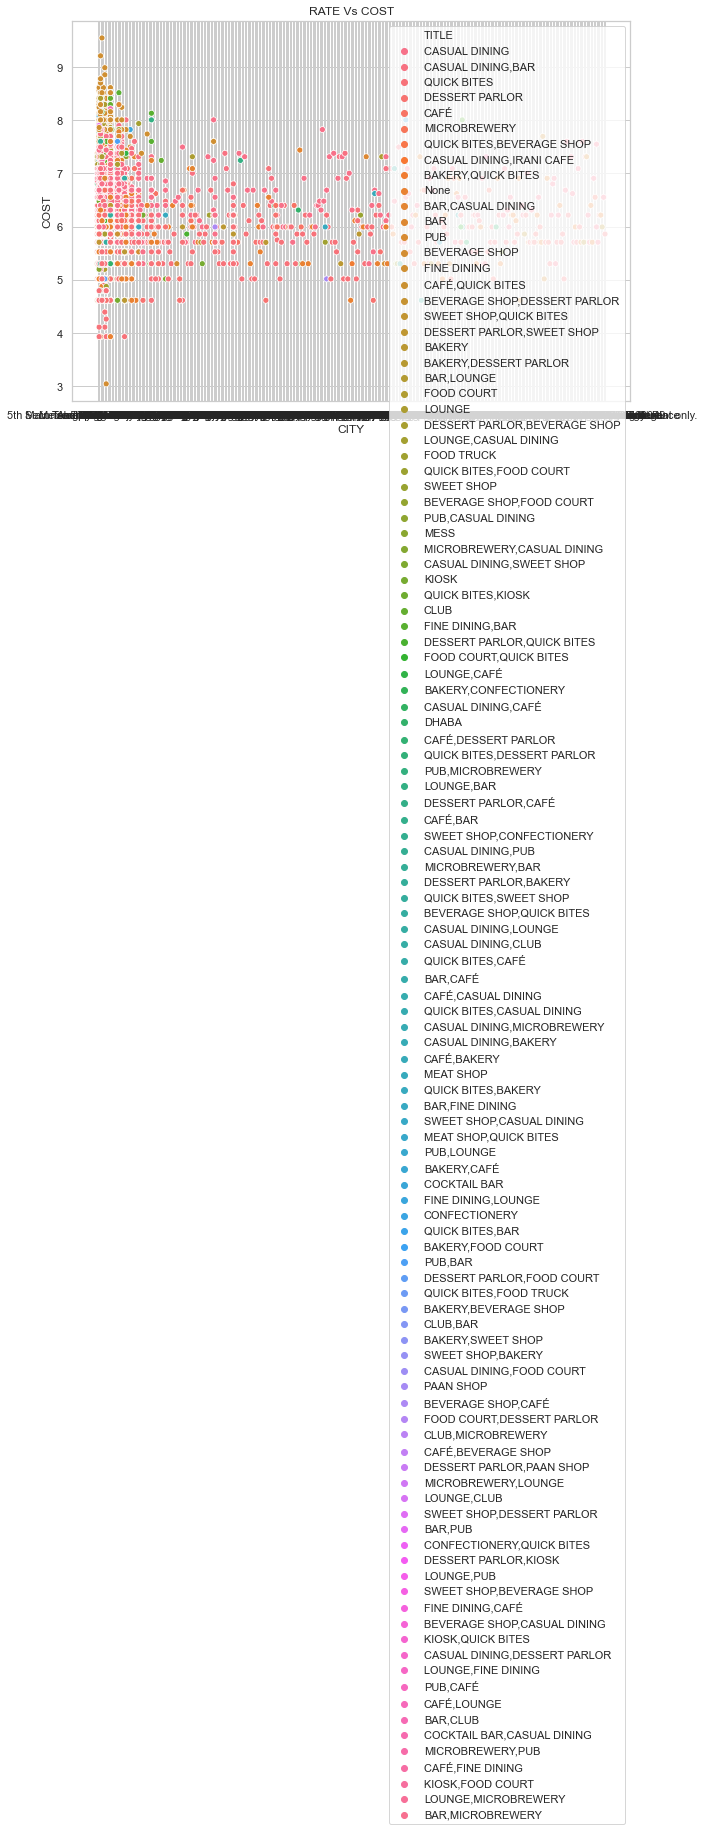

In [52]:
plt.figure(figsize = (10,7))
sns.scatterplot(x = "CITY", y = "COST", hue = "TITLE", data = df)
plt.title("RATE Vs COST")
plt.show()

# Multivariant Analysis

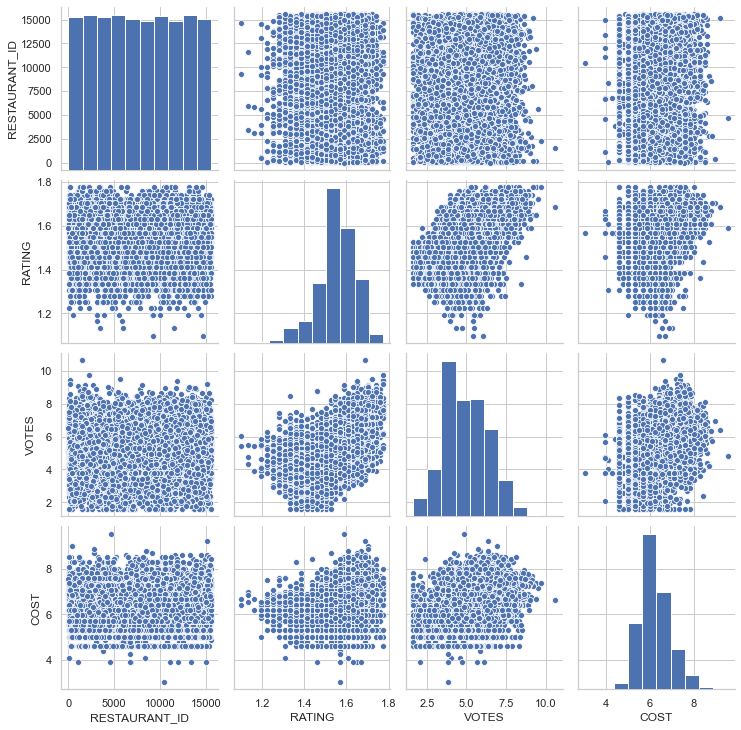

In [53]:
sns.pairplot(df)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000183885C0760>,
      dtype=object)

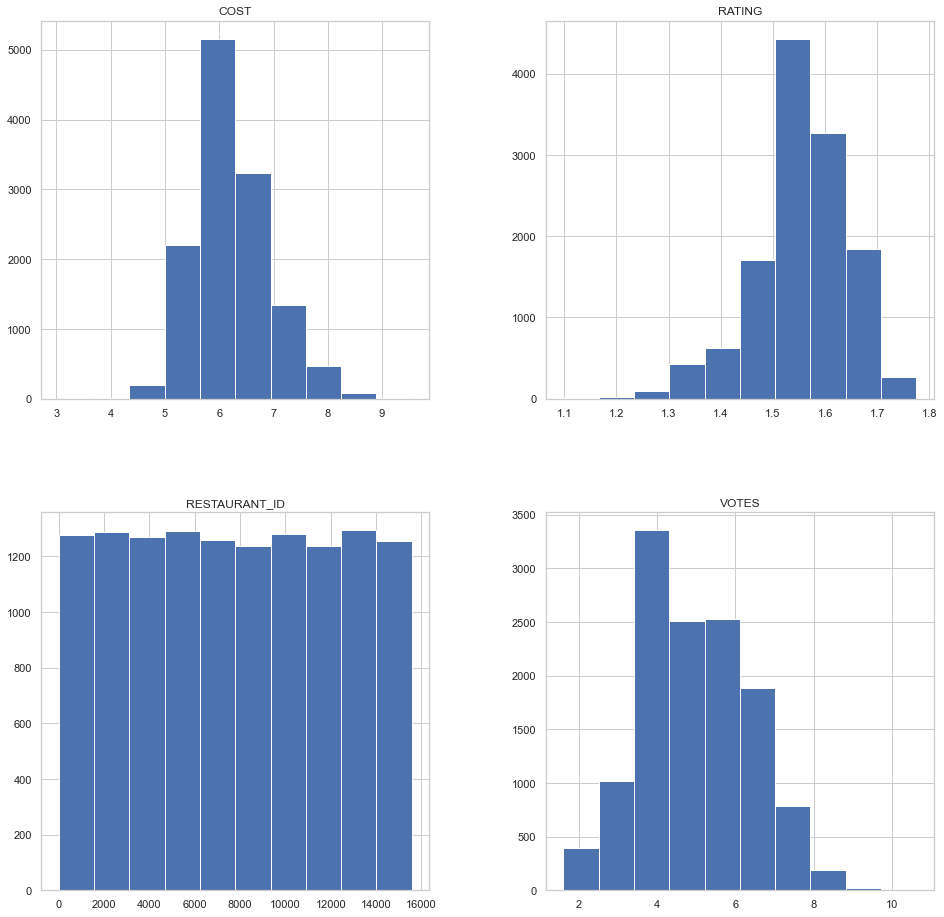

In [54]:
df.hist(figsize=(16,16))

# Plotting Outliers

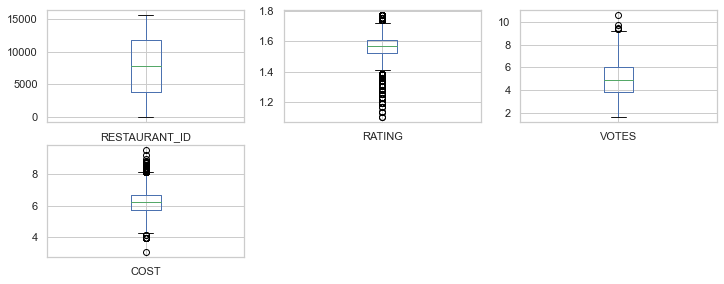

In [55]:
df.plot(kind='box',subplots=True,layout=(5,3),figsize=(12,12))
plt.show()

In [57]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
mappings=list()

for column in range(len(df.columns)):
    df[df.columns[column]]=le.fit_transform(df[df.columns[column]])
    mappings_dict={index: label for index, label in enumerate(le.classes_)}
    mappings.append(mappings_dict)

mappings

[{0: 'BAKERY',
  1: 'BAKERY,BEVERAGE SHOP',
  2: 'BAKERY,CAFÉ',
  3: 'BAKERY,CONFECTIONERY',
  4: 'BAKERY,DESSERT PARLOR',
  5: 'BAKERY,FOOD COURT',
  6: 'BAKERY,QUICK BITES',
  7: 'BAKERY,SWEET SHOP',
  8: 'BAR',
  9: 'BAR,CAFÉ',
  10: 'BAR,CASUAL DINING',
  11: 'BAR,CLUB',
  12: 'BAR,FINE DINING',
  13: 'BAR,LOUNGE',
  14: 'BAR,MICROBREWERY',
  15: 'BAR,PUB',
  16: 'BEVERAGE SHOP',
  17: 'BEVERAGE SHOP,CAFÉ',
  18: 'BEVERAGE SHOP,CASUAL DINING',
  19: 'BEVERAGE SHOP,DESSERT PARLOR',
  20: 'BEVERAGE SHOP,FOOD COURT',
  21: 'BEVERAGE SHOP,QUICK BITES',
  22: 'CAFÉ',
  23: 'CAFÉ,BAKERY',
  24: 'CAFÉ,BAR',
  25: 'CAFÉ,BEVERAGE SHOP',
  26: 'CAFÉ,CASUAL DINING',
  27: 'CAFÉ,DESSERT PARLOR',
  28: 'CAFÉ,FINE DINING',
  29: 'CAFÉ,LOUNGE',
  30: 'CAFÉ,QUICK BITES',
  31: 'CASUAL DINING',
  32: 'CASUAL DINING,BAKERY',
  33: 'CASUAL DINING,BAR',
  34: 'CASUAL DINING,CAFÉ',
  35: 'CASUAL DINING,CLUB',
  36: 'CASUAL DINING,DESSERT PARLOR',
  37: 'CASUAL DINING,FOOD COURT',
  38: 'CASUAL DINING,I

# Treating Outliers

In [59]:
from scipy.stats import zscore
z_score=abs(zscore(df))
print(df.shape)
dffinal=df.loc[(z_score<3).all(axis=1)]
print(dffinal.shape)

(12690, 10)
(11853, 10)


In [60]:
df=dffinal
df.shape

(11853, 10)

In [61]:
df.skew()

TITLE            -0.092262
RESTAURANT_ID     0.008415
CUISINES         -0.218778
TIME              0.309133
CITY              0.248914
LOCALITY          0.320168
RATING           -0.451387
VOTES             1.795569
COST              1.201922
CLOSED          -10.930057
dtype: float64

In [63]:
df.skew()
for col in df.skew().index:
    if col in df.describe().columns:
        if df[col].skew()>0.55:
            df[col]=np.sqrt(df[col])
        if df[col].skew()<-0.55:
            df[col]=np.cbrt(df[col])

# treating the skewness
#for col in df.columns:
 #   if df[col].skew()>0.55:
  #      df[col]=np.log1p(df[col])

#rechecking the skewness of our DataSet

df.skew()

TITLE            -0.092262
RESTAURANT_ID     0.008415
CUISINES         -0.218778
TIME              0.309133
CITY              0.248914
LOCALITY          0.320168
RATING           -0.451387
VOTES             0.356061
COST              0.139332
CLOSED          -11.358051
dtype: float64

# Model Prepration

In [64]:
x = df.drop(['COST'],axis=1)
y = df['COST']

In [65]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
xsc=sc.fit_transform(x)
xsc=pd.DataFrame(xsc,columns=x.columns)

In [66]:
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
max_r2_score=0
for r_state in range(0,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.30,random_state=r_state)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    y_pred = lr.predict(x_test)
    r2_scr = r2_score(y_test,y_pred)
    if r2_scr>max_r2_score:
        max_r2_score = r2_scr
        final_r_state = r_state
    
print("random state for max R2 score ",final_r_state,"is",max_r2_score)

random state for max R2 score  50 is 0.31922137470693346


In [67]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=50)

In [68]:
print(x.shape,'\n',y.shape)

(11853, 9) 
 (11853,)


In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.ensemble import GradientBoostingRegressor, BaggingRegressor
from xgboost.sklearn import XGBRegressor

In [70]:
LR = LinearRegression()
RR = Ridge()
LSR = Lasso()
KNN = KNeighborsRegressor()
SV = SVR()
DTC = DecisionTreeRegressor()
RFC = RandomForestRegressor()
ABC = AdaBoostRegressor()
GBC = GradientBoostingRegressor()
XGB = XGBRegressor()


In [76]:
models = []
models.append(("LinearRegression", LR))
models.append(("Ridge", RR))
models.append(("Lasso", LSR))
models.append(("KNeighborsRegressor", KNN))
models.append(("SVR", SV))
models.append(("DecisionTreeRegressor", DTC))
models.append(("RandomForestRegressor", RFC))
models.append(("AdaBoostRegressor", ABC))
models.append(("GradientBoostingRegressor", GBC))
models.append(("XGBoostRegressor", XGB))

In [77]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, random_state=50, shuffle=True)

In [78]:
Model = []
score = []
cvs = []
MSE = []
MAE = []
RMAE = []

for name,model in models:
    
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre = model.predict(x_test)
    
    R2 = r2_score(y_test,pre)
    print("R2 Score = ",R2)
    score.append(R2)
    
    sc = cross_val_score(model,x,y,cv=kf,scoring="r2").mean()
    print("Cross val score = ",sc)
    cvs.append(sc)
    
    mse = mean_squared_error(y_test,pre)
    print("Mean Squared error: {}".format(mse))
    MSE.append(mse)
    
    mae = mean_absolute_error(y_test,pre)
    print("Mean absolute error: {}".format(mae))
    MAE.append(mae)
    
    rmae = np.sqrt(mean_absolute_error(y_test,pre))
    print("Root Mean absolute error: {}".format(rmae))
    RMAE.append(rmae)
    
    print("\n")

LinearRegression()
R2 Score =  0.31922137470693346
Cross val score =  0.2939928763190839
Mean Squared error: 0.043003744100561576
Mean absolute error: 0.15820280009536475
Root Mean absolute error: 0.3977471559865196


Ridge()
R2 Score =  0.31954347976121733
Cross val score =  0.2935086673901236
Mean Squared error: 0.04298339721713532
Mean absolute error: 0.15801160181893945
Root Mean absolute error: 0.39750673179072005


Lasso()
R2 Score =  0.1597209460652972
Cross val score =  0.15289450341586494
Mean Squared error: 0.053079142126288434
Mean absolute error: 0.1781584439267341
Root Mean absolute error: 0.4220881944887041


KNeighborsRegressor()
R2 Score =  0.04517063629922258
Cross val score =  0.04427420312913559
Mean Squared error: 0.06031510992081152
Mean absolute error: 0.19229107059595296
Root Mean absolute error: 0.4385100575767367


SVR()
R2 Score =  0.21802560359557344
Cross val score =  0.2201778601791296
Mean Squared error: 0.04939612612204254
Mean absolute error: 0.172557583

In [79]:
result = pd.DataFrame({"Model": Model, "R2 Socre": score, "Cross val score": cvs, "Mean Squared Error": MSE, "Mean Absolute Error": MAE, "Root Mean Absolute Error": RMAE})
result

,Model,R2 Socre,Cross val score,Mean Squared Error,Mean Absolute Error,Root Mean Absolute Error
0,LinearRegression,0.319221,0.293993,0.043004,0.158203,0.397747
1,Ridge,0.319543,0.293509,0.042983,0.158012,0.397507
2,Lasso,0.159721,0.152895,0.053079,0.178158,0.422088
3,KNeighborsRegressor,0.045171,0.044274,0.060315,0.192291,0.438510
4,SVR,0.218026,0.220178,0.049396,0.172558,0.415401
5,DecisionTreeRegressor,0.312380,0.292906,0.043436,0.156460,0.395550
6,RandomForestRegressor,0.655100,0.650101,0.021787,0.113916,0.337514
7,AdaBoostRegressor,0.369775,0.346724,0.039810,0.154967,0.393659
8,GradientBoostingRegressor,0.615315,0.612579,0.024300,0.120026,0.346448
9,XGBoostRegressor,0.664955,0.661132,0.021164,0.112004,0.334671


# XGBoostRegressor is performing well and the model is also not under or over fitting with and score of around 70%

In [80]:
XGB = XGBRegressor(random_state=50)
from pprint import pprint

print('Parameters currently in use:\n')
pprint(XGB.get_params())

Parameters currently in use:

{'base_score': None,
 'booster': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'gamma': None,
 'gpu_id': None,
 'importance_type': 'gain',
 'interaction_constraints': None,
 'learning_rate': None,
 'max_delta_step': None,
 'max_depth': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'objective': 'reg:squarederror',
 'random_state': 50,
 'reg_alpha': None,
 'reg_lambda': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}


In [81]:
from sklearn.model_selection import GridSearchCV
parameters = {'nthread':[4],     
              'learning_rate': [.03, 0.05, .07], 
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [100,200,500,800,1000]
             }
grid = GridSearchCV(estimator=XGB,param_grid=parameters,cv=2,
                    n_jobs=5,verbose=True)
grid.fit(x_train,y_train)
print(grid)
print(grid.best_score_)
print(grid.best_estimator_.n_estimators)
print(grid.best_params_)

Fitting 2 folds for each of 45 candidates, totalling 90 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   40.8s
[Parallel(n_jobs=5)]: Done  90 out of  90 | elapsed:  1.6min finished


[23:42:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


GridSearchCV(cv=2,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, 

In [82]:
XGB = XGBRegressor(colsample_bytree= 0.7, learning_rate= 0.03, max_depth= 5,
                   min_child_weight= 4, n_estimators= 1000, nthread= 4,
                   subsample= 0.7)
XGB.fit(x_train,y_train)
print("Score=",XGB.score(x_train,y_train))
predxgb = XGB.predict(x_test)
print("\n")
print('Mean Absolute Error= ', mean_absolute_error(y_test,predxgb))
print('Mean squared Error= ', mean_squared_error(y_test,predxgb))
print('Root Mean Absolute Error= ', np.sqrt(mean_absolute_error(y_test,predxgb)))
print("\n")
print('R2 Score=',r2_score(y_test,predxgb))

Score= 0.8286803192836405


Mean Absolute Error=  0.10825908894138248
Mean squared Error=  0.01945043880088469
Root Mean Absolute Error=  0.3290274896439239


R2 Score= 0.6920862760868237


# After hyper tuning we can observe that the score is increased by 66% to 82%

# Cross Validate XGBRegressor

In [83]:
score=cross_val_score(XGB,x,y,cv=4,scoring='r2')
print('Score:',score)
print('Mean Score',score.mean())
print('Standard Deviation',score.std())

Score: [0.6870965  0.67674163 0.68464232 0.70280865]
Mean Score 0.6878222729718938
Standard Deviation 0.009460588444476793


# Scatter plot between testdata and predict data

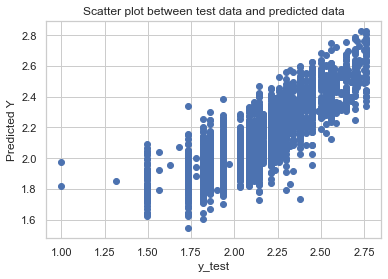

In [84]:
plt.scatter(y_test,predxgb)
plt.xlabel('y_test')
plt.ylabel('Predicted Y')
plt.title('Scatter plot between test data and predicted data')
plt.show()

The model is performing well and let's save our model and implement it on the testdataset.

In [85]:
import joblib
joblib.dump(XGB,'restaurantbill.pkl')

['restaurantbill.pkl']

# Loading the Test Dataset

In [92]:
testdf=pd.read_excel("C:/Users/stead/Downloads/Restaurant_food_cost/Participants_Data_Final/Data_Test.xlsx")
testdf.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes


In [93]:
testdf.shape

(4231, 8)

In [94]:
for i in testdf.columns:
    print(testdf[i].value_counts())
    print('\n')

QUICK BITES                   1416
CASUAL DINING                 1258
None                           284
CAFÉ                           223
DESSERT PARLOR                 126
                              ... 
SWEET SHOP,DESSERT PARLOR        1
BAR,PUB                          1
CASUAL DINING,LOUNGE             1
CASUAL DINING,MICROBREWERY       1
IRANI CAFE,BAKERY                1
Name: TITLE, Length: 86, dtype: int64


12799    3
15454    3
4262     3
11169    3
1619     3
        ..
9598     1
11432    1
3451     1
5496     1
10241    1
Name: RESTAURANT_ID, Length: 4127, dtype: int64


North Indian, Chinese                                             213
North Indian                                                      190
South Indian                                                      174
Fast Food                                                          78
Chinese                                                            59
                                                      

In [95]:
for i in testdf.columns:
    print("Unique values in", i, testdf[i].nunique())

Unique values in TITLE 86
Unique values in RESTAURANT_ID 4127
Unique values in CUISINES 1727
Unique values in TIME 1183
Unique values in CITY 151
Unique values in LOCALITY 834
Unique values in RATING 31
Unique values in VOTES 1136


In [96]:
testdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4231 entries, 0 to 4230
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          4231 non-null   object
 1   RESTAURANT_ID  4231 non-null   int64 
 2   CUISINES       4231 non-null   object
 3   TIME           4231 non-null   object
 4   CITY           4196 non-null   object
 5   LOCALITY       4201 non-null   object
 6   RATING         4229 non-null   object
 7   VOTES          3829 non-null   object
dtypes: int64(1), object(7)
memory usage: 264.6+ KB


Observations:
1.We have 4231 rows and 8 columns in our dataset
2.City, Locality, Rating and  Votes have missing values in our dataset
3.We have two types of datatypes in our dataset i.e. object and int64

In [97]:
import re
def extract_closed(time):
    a = re.findall('Closed \(.*?\)', time)
    if a != []:
        return a[0]
    else:
        return 'Open All Days'

testdf['CLOSED'] =testdf['TIME'].apply(extract_closed)

In [98]:
testdf['TIME'] = testdf['TIME'].str.replace(r'Closed \(.*?\)','')
testdf['TIME'] = testdf['TIME'].str.replace(r'Closed...','')
testdf['RATING'] = testdf['RATING'].str.replace('NEW', '1')
testdf['RATING'] = testdf['RATING'].str.replace('-', '1').astype(float)
testdf['VOTES'] = testdf['VOTES'].str.replace(' votes', '').astype(float)
testdf['RATING'].fillna(3.8, inplace=True)  

In [99]:
testdf['VOTES'].fillna(44.0, inplace=True)
testdf.CITY.fillna("Others",inplace=True)
testdf.LOCALITY.fillna("Others",inplace=True)

In [100]:
testdf.isnull().sum()

TITLE            0
RESTAURANT_ID    0
CUISINES         0
TIME             0
CITY             0
LOCALITY         0
RATING           0
VOTES            0
CLOSED           0
dtype: int64

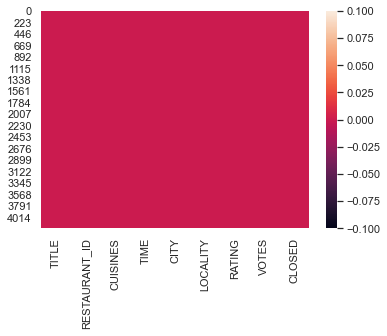

In [101]:
sns.heatmap(testdf.isnull())
plt.show()


In heatmap we can clearly see that now we do not have and missing values imputed all data successfully.

# CHecking outliers

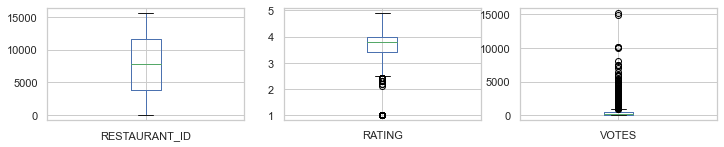

In [102]:
testdf.plot(kind='box',subplots=True,layout=(5,3),figsize=(12,12))
plt.show()

Rating and Votes column have outliers

In [103]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
mappings=list()

for column in range(len(testdf.columns)):
    testdf[testdf.columns[column]]=le.fit_transform(testdf[testdf.columns[column]])
    mappings_dict={index: label for index, label in enumerate(le.classes_)}
    mappings.append(mappings_dict)

mappings

[{0: 'BAKERY',
  1: 'BAKERY,BEVERAGE SHOP',
  2: 'BAKERY,CAFÉ',
  3: 'BAKERY,CASUAL DINING',
  4: 'BAKERY,DESSERT PARLOR',
  5: 'BAKERY,QUICK BITES',
  6: 'BAR',
  7: 'BAR,CASUAL DINING',
  8: 'BAR,LOUNGE',
  9: 'BAR,PUB',
  10: 'BEVERAGE SHOP',
  11: 'BEVERAGE SHOP,CAFÉ',
  12: 'BEVERAGE SHOP,DESSERT PARLOR',
  13: 'BEVERAGE SHOP,QUICK BITES',
  14: 'BHOJANALYA',
  15: 'CAFÉ',
  16: 'CAFÉ,BAKERY',
  17: 'CAFÉ,BAR',
  18: 'CAFÉ,CASUAL DINING',
  19: 'CAFÉ,DESSERT PARLOR',
  20: 'CAFÉ,FOOD COURT',
  21: 'CAFÉ,LOUNGE',
  22: 'CAFÉ,QUICK BITES',
  23: 'CASUAL DINING',
  24: 'CASUAL DINING,BAKERY',
  25: 'CASUAL DINING,BAR',
  26: 'CASUAL DINING,CAFÉ',
  27: 'CASUAL DINING,FOOD COURT',
  28: 'CASUAL DINING,IRANI CAFE',
  29: 'CASUAL DINING,LOUNGE',
  30: 'CASUAL DINING,MICROBREWERY',
  31: 'CASUAL DINING,PUB',
  32: 'CASUAL DINING,SWEET SHOP',
  33: 'CLUB',
  34: 'CLUB,BAR',
  35: 'CLUB,CASUAL DINING',
  36: 'CLUB,FINE DINING',
  37: 'COCKTAIL BAR,CASUAL DINING',
  38: 'CONFECTIONERY',
  3

In [104]:
#from scipy.stats import zscore
#z_score=abs(zscore(testdf))
#print(testdf.shape)
#testdffinal=testdf.loc[(z_score<3).all(axis=1)]
#print(testdffinal.shape)

#testdf=testdffinal
#testdf.shape

# Not removing the Outliers from our Test Dataset as it is effecting our result.

In [105]:
testdf.skew()

TITLE           -0.019891
RESTAURANT_ID    0.000021
CUISINES        -0.211171
TIME             0.308980
CITY             0.067531
LOCALITY         0.293775
RATING          -1.188102
VOTES            1.290360
CLOSED          -6.881044
dtype: float64

In [106]:

testdf.skew()
for col in testdf.skew().index:
    if col in testdf.describe().columns:
        if testdf[col].skew()>0.55:
            testdf[col]=np.sqrt(testdf[col])
        if testdf[col].skew()<-0.55:
            testdf[col]=np.cbrt(testdf[col])

for col in df.columns:
    if df[col].skew()>0.55:
        df[col]=np.log1p(df[col])
testdf.skew()

TITLE           -0.019891
RESTAURANT_ID    0.000021
CUISINES        -0.211171
TIME             0.308980
CITY             0.067531
LOCALITY         0.293775
RATING          -2.396183
VOTES            0.651259
CLOSED          -7.555612
dtype: float64

treated the skewness in our dataset

In [107]:
xt = testdf[['TITLE','RESTAURANT_ID','CUISINES','TIME','CITY','LOCALITY','RATING','VOTES','CLOSED']]
print(xt.shape)

(4231, 9)


In [108]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
xtsc=sc.fit_transform(xt)
xtsc=pd.DataFrame(xtsc,columns=xt.columns)

In [110]:
XBG_test=joblib.load('restaurantbill.pkl')
XBG_test

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.03, max_delta_step=0, max_depth=5,
             min_child_weight=4, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=4, nthread=4, num_parallel_tree=1,
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             subsample=0.7, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [111]:
XBG_predict=XBG_test.predict(xt)
XBG_predict

array([2.3088925, 2.4937346, 2.2973182, ..., 2.4516766, 2.478211 ,
       2.4353647], dtype=float32)

In [112]:
Predicted=np.exp(XBG_predict)
Predicted=Predicted.astype(int)

In [117]:
pd.DataFrame(Predicted, columns=['COST'])

,COST
0,10
1,12
2,9
3,9
4,11
...,...
4226,10
4227,9
4228,11
4229,11


In [114]:
pd.DataFrame(Predicted).rename(columns = {0 : 'COST'})

,COST
0,10
1,12
2,9
3,9
4,11
...,...
4226,10
4227,9
4228,11
4229,11


In [115]:
food_test_final = pd.read_excel("C:/Users/stead/Downloads/Restaurant_food_cost/Participants_Data_Final/Data_Test.xlsx")

food_ID = food_test_final[['CUISINES']]

food_test_final = pd.concat([food_ID, pd.DataFrame(Predicted).rename(columns = {0 : 'COST'})], axis=1)

food_test_final

,CUISINES,COST
0,"North Indian, Chinese, Mughlai, Kebab",10
1,"South Indian, Fast Food, Pizza, North Indian",12
2,"North Indian, Seafood, Biryani, Chinese",9
3,Biryani,9
4,"South Indian, Kerala",11
...,...,...
4226,"North Indian, Mughlai, Chinese",10
4227,"Biryani, North Indian, Sandwich, Salad, Wraps",9
4228,"Continental, North Indian",11
4229,"Rolls, Beverages",11


# our model is perforing extreme well on the raw test data set also

In [116]:
food_test_final.to_csv('restaurantbill.csv',index=False)